# Distributions in Pandas

In [1]:
import numpy as np
import pandas as pd

In [6]:
np.random.binomial(1,0.5)

1

In [12]:
np.random.binomial(1000, 0.5)/1000

0.513

In [15]:
chance_of_tornado = 0.01/100
np.random.binomial(10000, chance_of_tornado)

2

In [16]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

93 tornadoes back to back in 2739.72602739726 years


In [17]:
np.random.uniform(0,1)

0.5122862128870809

In [19]:
np.random.normal(0.75)

0.3567327887492675

In [23]:
distribution = np.random.normal(0, 1, size = 10000)
np.std(distribution)

0.9894103407668329

In [24]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.00439884493065712

In [25]:
stats.skew(distribution)

0.011351017419975386

In [31]:
chi_square2 = np.random.chisquare(2, size = 10000)
stats.skew(chi_square2)

1.903478657624672

In [32]:
chi_square10 = np.random.chisquare(10, size = 10000)
stats.skew(chi_square10)

0.9137592013512654

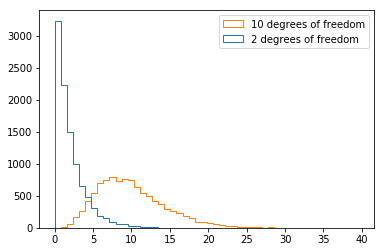

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_square2,chi_square10], bins=50, histtype='step', 
                  label=['2 degrees of freedom','10 degrees of freedom'])
plt.legend(loc='upper right')



# Hypothesis Testing

In [34]:
df = pd.read_csv('grades.csv')

In [35]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [36]:
early_df = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [38]:
early_df.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [40]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [41]:
stats.ttest_ind(early_df['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [43]:
stats.ttest_ind(early_df['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [44]:
from scipy import stats
stats.ttest_ind?

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
pd.DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )

,State,RegionName
0,Michigan,Ann Arbor
1,Michigan,Yipsilanti


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [5]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [6]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'.''' 
    
    data = pd.read_table('university_towns.txt',sep='\n',header = None)
    data.columns = ['RegionName']
    data['state label'] = data['RegionName'].str.contains(pat=r'\[edit\]')
    data['RegionName'] = data['RegionName'].str.replace('\[.*\]', '')
    data['RegionName'] = data['RegionName'].str.replace('\s\(.*', '')
#     data['RegionName'] = data['RegionName'].str.replace('.*\,\s', '')
    
    data['State'] = data['RegionName'].copy()
    state = ''
    drop_list = []
    for i in range(len(data)):
        
        if data.loc[i]['state label'] == True:
            state = data.loc[i]['RegionName']
#             data.loc[i]['state'] = state
            drop_list.append(i)
        else:
            data.set_value(i,'State',state)
#         print(state)
    data.drop(drop_list, inplace = True)

    data.drop('state label', axis = 1, inplace = True)
    data = data.set_index(['State'])
    data = data.reset_index()
    return data
    
get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [7]:
import re
import pandas as pd
import numpy as np
# list of unique states
stateStr = """
Ohio, Kentucky, American Samoa, Nevada, Wyoming
,National, Alabama, Maryland, Alaska, Utah
,Oregon, Montana, Illinois, Tennessee, District of Columbia
,Vermont, Idaho, Arkansas, Maine, Washington
,Hawaii, Wisconsin, Michigan, Indiana, New Jersey
,Arizona, Guam, Mississippi, Puerto Rico, North Carolina
,Texas, South Dakota, Northern Mariana Islands, Iowa, Missouri
,Connecticut, West Virginia, South Carolina, Louisiana, Kansas
,New York, Nebraska, Oklahoma, Florida, California
,Colorado, Pennsylvania, Delaware, New Mexico, Rhode Island
,Minnesota, Virgin Islands, New Hampshire, Massachusetts, Georgia
,North Dakota, Virginia
"""
#list of regionName entries string length
regNmLenStr = """
06,08,12,10,10,04,10,08,09,09,05,06,11,06,12,09,08,10,12,06,
06,06,08,05,09,06,05,06,10,28,06,06,09,06,08,09,10,35,09,15,
13,10,07,21,08,07,07,07,12,06,14,07,08,16,09,10,11,09,10,06,
11,05,06,09,10,12,06,06,11,07,08,13,07,11,05,06,06,07,10,08,
11,08,13,12,06,04,08,10,08,07,12,05,06,09,07,10,16,10,06,12,
08,07,06,06,06,11,14,11,07,06,06,12,08,10,11,06,10,14,04,11,
18,07,07,08,09,06,13,11,12,10,07,12,07,04,08,09,09,13,08,10,
16,09,10,08,06,08,12,07,11,09,07,09,06,12,06,09,07,10,09,10,
09,06,15,05,10,09,11,12,10,10,09,13,06,09,11,06,11,09,13,37,
06,13,06,09,49,07,11,12,09,11,11,07,12,10,06,06,09,04,09,15,
10,12,05,09,08,09,09,07,14,06,07,16,12,09,07,09,06,32,07,08,
08,06,10,36,09,10,09,06,09,11,09,06,10,07,14,08,07,06,10,09,
05,11,07,06,08,07,05,07,07,04,06,05,09,04,25,06,07,08,05,08,
06,05,11,09,07,07,06,13,09,05,16,05,10,09,08,11,06,06,06,10,
09,07,06,07,10,05,08,07,06,08,06,30,09,07,06,11,07,12,08,09,
16,12,11,08,06,04,10,10,15,05,11,11,09,08,06,04,10,10,07,09,
11,08,26,07,13,05,11,03,08,07,06,05,08,13,10,08,08,08,07,07,
09,05,04,11,11,07,06,10,11,03,04,06,06,08,08,06,10,09,05,11,
07,09,06,12,13,09,10,11,08,07,07,08,09,10,08,10,08,56,07,12,
07,16,08,04,10,10,10,10,07,09,08,09,09,10,07,09,09,09,12,14,
10,29,19,07,11,12,13,13,09,10,12,12,12,08,10,07,10,07,07,08,
08,08,09,10,09,11,09,07,09,10,11,11,10,09,09,12,09,06,08,07,
12,09,07,07,06,06,08,06,15,08,06,06,10,10,10,07,05,10,07,11,
09,12,10,12,04,10,05,05,04,14,07,10,09,07,11,10,10,10,11,15,
09,14,12,09,09,07,12,04,10,10,06,10,07,28,06,10,08,09,10,10,
10,13,12,08,10,09,09,07,09,09,07,11,11,13,08,10,07
"""

df = get_list_of_university_towns()

cols = ["State", "RegionName"]

print('Shape test: ', "Passed" if df.shape ==
      (517, 2) else 'Failed')
print('Index test: ',
      "Passed" if df.index.tolist() == list(range(517))
      else 'Failed')

print('Column test: ',
      "Passed" if df.columns.tolist() == cols else 'Failed')
print('\\n test: ',
      "Failed" if any(df[cols[0]].str.contains(
          '\n')) or any(df[cols[1]].str.contains('\n'))
      else 'Passed')
print('Trailing whitespace test:',
      "Failed" if any(df[cols[0]].str.contains(
          '\s+$')) or any(df[cols[1]].str.contains(
              '\s+$'))
      else 'Passed')
print('"(" test:',
      "Failed" if any(df[cols[0]].str.contains(
          '\(')) or any(df[cols[1]].str.contains(
              '\('))
      else 'Passed')
print('"[" test:',
      "Failed" if any(df[cols[0]].str.contains(
          '\[')) or any(df[cols[1]].str.contains(
              '\]'))
      else 'Passed')

states_vlist = [st.strip() for st in stateStr.split(',')]

mismatchedStates = df[~df['State'].isin(
    states_vlist)].loc[:, 'State'].unique()
print('State test: ', "Passed" if len(
    mismatchedStates) == 0 else "Failed")
if len(mismatchedStates) > 0:
    print()
    print('The following states failed the equality test:')
    print()
    print('\n'.join(mismatchedStates))

df['expected_length'] = [int(s.strip())
                         for s in regNmLenStr.split(',')
                         if s.strip().isdigit()]
regDiff = df[df['RegionName'].str.len() != df['expected_length']].loc[
    :, ['RegionName', 'expected_length']]
regDiff['actual_length'] = regDiff['RegionName'].str.len()
print('RegionName test: ', "Passed" if len(regDiff) ==
      0 else ' \nMismatching regionNames\n {}'.format(regDiff))



Shape test:  Passed
Index test:  Passed
Column test:  Passed
\n test:  Passed
Trailing whitespace test: Passed
"(" test: Passed
"[" test: Passed
State test:  Passed
RegionName test:  Passed


In [8]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    gdp_data = pd.read_excel('gdplev.xls', skiprows = 219, usecols = [4,5])
    gdp_data.rename(columns={'1999q4':'quarter', 9926.1:'GDP'}, inplace=True)
    for i in range(len(gdp_data)-2):
        if (gdp_data.iloc[i]['GDP'] > gdp_data.iloc[i+1]['GDP']) and (gdp_data.iloc[i+1]['GDP'] > gdp_data.iloc[i+2]['GDP']):
            return gdp_data.iloc[i]['quarter']

get_recession_start()

'2008q3'

In [9]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    gdp_data = pd.read_excel('gdplev.xls', skiprows = 219, usecols = [4,5])
    gdp_data.rename(columns={'1999q4':'quarter', 9926.1:'GDP'}, inplace=True)
    start = get_recession_start()
    start_time = gdp_data[gdp_data['quarter'] == start].index.tolist()[0]
    gdp_data = gdp_data[start_time:]
    for i in range(len(gdp_data)-2):
        if (gdp_data.iloc[i]['GDP'] < gdp_data.iloc[i+1]['GDP']) and (gdp_data.iloc[i+1]['GDP'] < gdp_data.iloc[i+2]['GDP']):
            return gdp_data.iloc[i+2]['quarter']
get_recession_end()

'2009q4'

In [10]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    gdp_data = pd.read_excel('gdplev.xls', skiprows = 219, usecols = [4,5])
    gdp_data.rename(columns={'1999q4':'quarter', 9926.1:'GDP'}, inplace=True)
    
    a = gdp_data.index[gdp_data['quarter'] == get_recession_start()][0]
    b = gdp_data.index[gdp_data['quarter'] == get_recession_end()][0]
    ans = gdp_data.iloc[gdp_data[a:b+1]['GDP'].idxmin(), 0]
    return ans

get_recession_bottom()

'2009q2'

In [11]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    house_data = pd.read_csv('City_Zhvi_AllHomes.csv')
    house_data['State'] = house_data['State'].map(states)
    house_data.set_index(['State', 'RegionName'], inplace = True)
    house_data  = house_data.loc[:,'2000-01':]
    col = [str(i) + j for i in range(2000,2017) for j in ['q1','q2','q3','q4']][:-1]
    ind = 0
    for i in col:
        house_data[i] = house_data.iloc[:,ind:ind+3].mean(axis = 1)
        ind = ind + 3
    house_data = house_data.loc[:, '2000q1':]
    return house_data
convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,5.872000e+05
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,4.583889e+05
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,1.874667e+05
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,1.034667e+05
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,1.674111e+05
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,1.775000e+05
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,4.341333e+05
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,1.276889e+05
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,6.728889e+05


In [12]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    data = convert_housing_data_to_quarters()
    house_data = data.loc[:, get_recession_start(): get_recession_bottom()]
    house_data.reset_index(inplace = True)
    house_data['Ratio'] = (house_data[get_recession_start()] - house_data[get_recession_bottom()])/house_data[get_recession_start()]
    university_town = get_list_of_university_towns()
    uni_town_list = university_town['RegionName'].tolist()
    house_data['IsUni'] = house_data.RegionName.apply(lambda x: x in uni_town_list)
    uni_data = house_data[house_data.IsUni].copy().dropna()
    not_uni_data = house_data[~house_data.IsUni].copy().dropna()
    p = ttest_ind(uni_data['Ratio'], not_uni_data['Ratio'])[1]
    diff = p < 0.01
    low = 'university town' if uni_data['Ratio'].mean() < not_uni_data['Ratio'].mean() else 'non-university town'
    return (diff, p, low)
run_ttest()

/Users/xinxiaoxue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinxiaoxue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(True, 0.0003664160159552697, 'university town')